In [17]:
import numpy as np
import struct

def read_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)
    
path_prefix = './data/MNIST/'

# Reading the image files
train_images = read_idx(path_prefix+'train-images-idx3-ubyte/train-images-idx3-ubyte')
test_images = read_idx(path_prefix+'t10k-images-idx3-ubyte/t10k-images-idx3-ubyte')

# Reading the label files
train_labels = read_idx(path_prefix+'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_labels = read_idx(path_prefix+'t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

print(f'Training images shape: {train_images.shape}')
print(f'Training labels shape: {train_labels.shape}')
print(f'Test images shape: {test_images.shape}')
print(f'Test labels shape: {test_labels.shape}')


Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


In [18]:
from src.PCA import PCA

pca = PCA(n_components=2)

pca.fit(train_images.reshape(train_images.shape[0], -1))

pca.transform(train_images.reshape(train_images.shape[0], -1))

Array([[ 880.73157 ,  329.95056 ],
       [1768.5175  ,  312.133   ],
       [ 704.94934 , -374.8967  ],
       ...,
       [ 578.74524 , -142.80147 ],
       [ 887.4051  ,   22.867981],
       [ 583.36273 ,   41.995262]], dtype=float32)

In [19]:
train_images_pca = pca.transform(train_images.reshape(train_images.shape[0], -1))

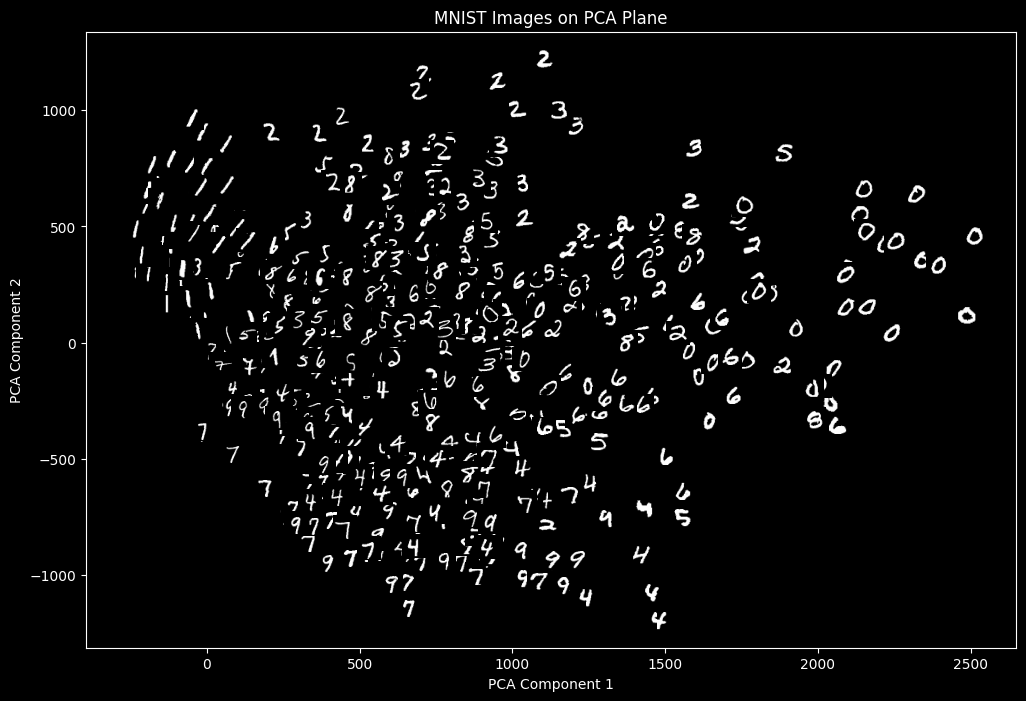

In [20]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.pyplot as plt

indices = np.random.choice(train_images.shape[0], 500, replace=False)
selected_images = train_images[indices]
selected_images_pca = train_images_pca[indices]

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(selected_images_pca[:, 0], selected_images_pca[:, 1])


for i, coords in enumerate(selected_images_pca):
    x, y = coords
    # print(coords)
    img = selected_images[i]
    imagebox = OffsetImage(img, zoom=0.6, cmap='gray')
    ab = AnnotationBbox(imagebox, (x, y), frameon=False)
    ax.add_artist(ab)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('MNIST Images on PCA Plane')
plt.show()

/tmp/ipykernel_28865/1211740396.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap(cmap)


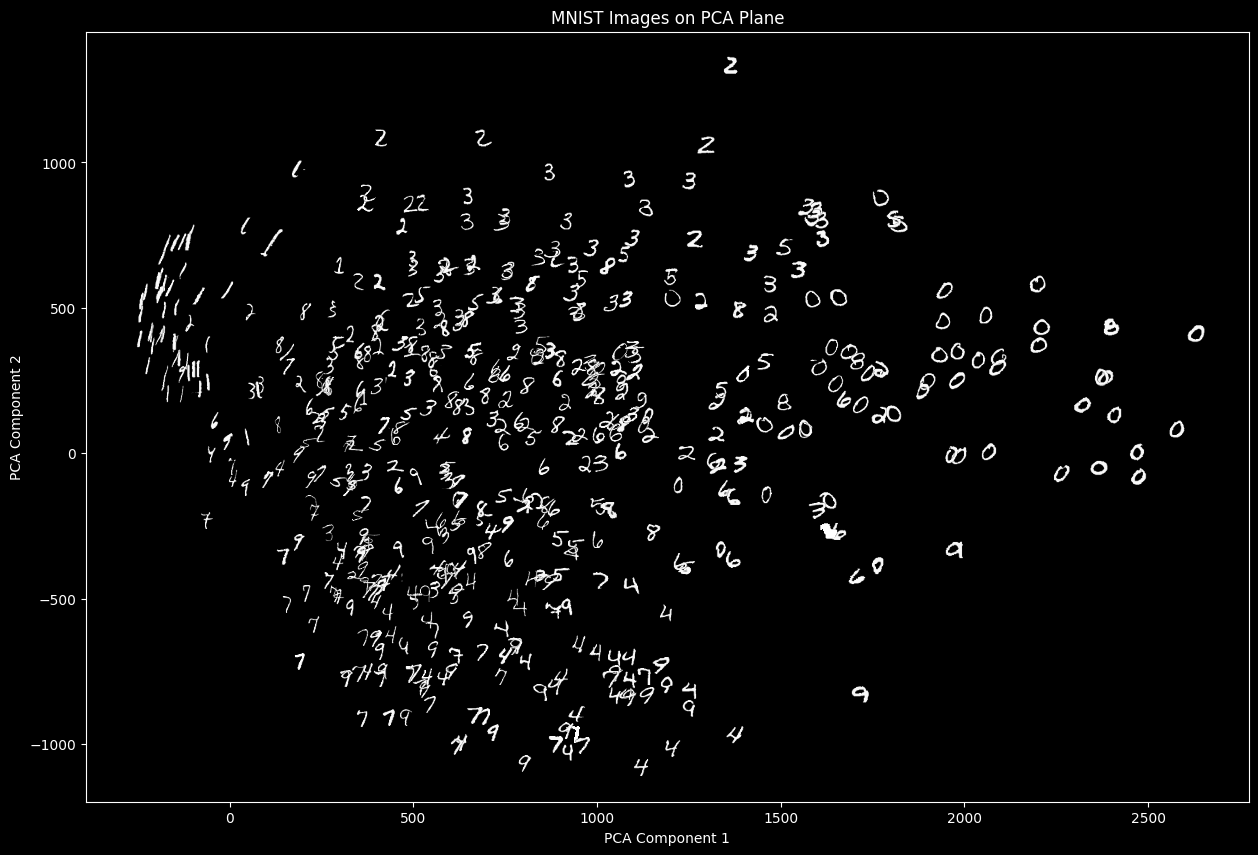

In [21]:
indices = np.random.choice(train_images.shape[0], 500, replace=False)
selected_images = train_images[indices]
selected_images_pca = train_images_pca[indices]

def to_rgba(image, cmap='gray'):
    from matplotlib.cm import get_cmap
    cmap = get_cmap(cmap)
    rgba_img = cmap(image)
    rgba_img[..., 3] = image / 255.0
    return rgba_img

fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(selected_images_pca[:, 0], selected_images_pca[:, 1], alpha=0)

for i, coords in enumerate(selected_images_pca):
    x, y = coords
    img = selected_images[i]
    rgba_img = to_rgba(img)
    imagebox = OffsetImage(rgba_img, zoom=0.6)
    ab = AnnotationBbox(imagebox, (x, y), frameon=False)
    ax.add_artist(ab)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('MNIST Images on PCA Plane')
plt.show()

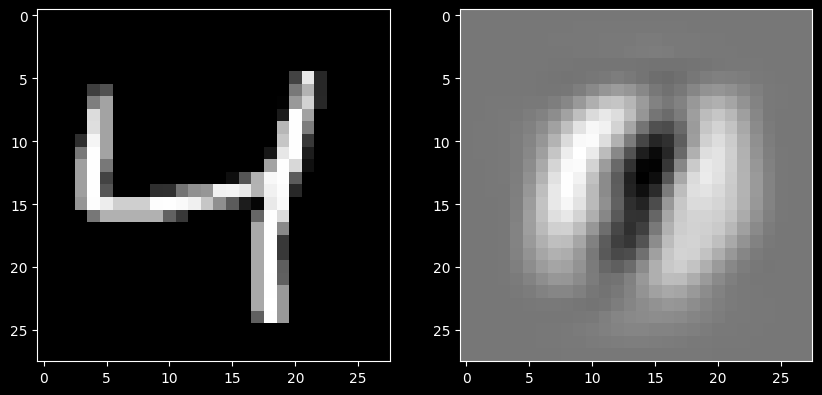

In [22]:
reconstruction = pca.reconstruct(train_images_pca)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
image_nr = 2

ax[0].imshow(train_images[image_nr], cmap='gray')

ax[1].imshow(reconstruction[image_nr].reshape(28, 28), cmap='gray')
plt.show()


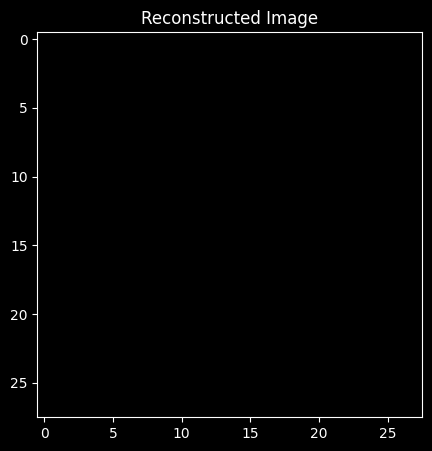

interactive(children=(FloatSlider(value=0.0, description='Component 1', max=1000.0, min=-1000.0, step=1.0), Fl…

FloatSlider(value=0.0, description='Component 1', max=1000.0, min=-1000.0, step=1.0)

FloatSlider(value=0.0, description='Component 2', max=1000.0, min=-1000.0, step=1.0)

In [41]:
import ipywidgets as widgets
from IPython.display import display


# Create the figure and axes
fig, ax = plt.subplots(1, 1, figsize=(10, 5))


def update_plot(component1, component2):
    print(component1, component2)
    components = np.array([[component1, component2]])
    reconstructed_image = pca.reconstruct(components)
    ax.imshow(reconstructed_image.reshape(28, 28), cmap='gray')
    # print(reconstructed_image.shape)
    # print(reconstructed_image)
    fig.canvas.draw_idle()

# Create sliders for PCA components
component1_slider = widgets.FloatSlider(value=0, min=-1000, max=1000, step=1, description='Component 1')
component2_slider = widgets.FloatSlider(value=0, min=-1000, max=1000, step=1, description='Component 2')

# Show the initial reconstructed image
initial_components = np.array([[component1_slider.value, component2_slider.value]])
reconstructed_image = pca.reconstruct(initial_components)
ax.imshow(reconstructed_image.reshape(28, 28), cmap='gray')
ax.set_title('Reconstructed Image')

# Create interactive widgets
widgets.interact(update_plot, component1=component1_slider, component2=component2_slider)

plt.show()

# Display sliders
display(component1_slider, component2_slider)


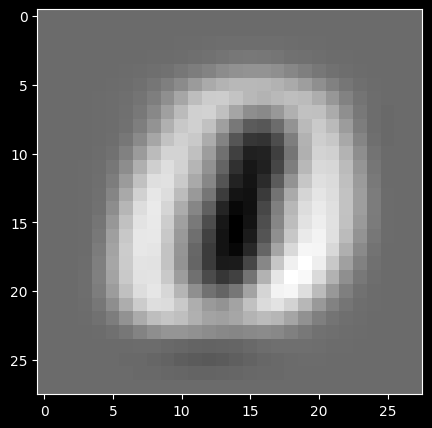

In [45]:
component_1 = 100
component_2 = 0

components = np.array([[component_1, component_2]])
reconstructed_image = pca.reconstruct(components)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.imshow(reconstructed_image.reshape(28, 28), cmap='gray')